# **Waterflow**


Résumé des étapes   :

### Étapes principales

1. **Exploration et Visualisation des Données**
   - Chargement des données (potabilité de l'eau)
   - Exploration des caractéristiques des données
   - Visualisation des distributions et des relations entre les variables
   - Suppression des valeurs manquantes et gestion des données aberrantes

2. **Préparation des Données**
   - Séparation des caractéristiques (`X`) et de la variable cible (`y`)
   - Remplacement des valeurs manquantes par la moyenne (`SimpleImputer`)
   - Division des données en ensembles d'entraînement et de test (`train_test_split`)
   - Normalisation des caractéristiques (`StandardScaler`)

3. **Machine à Vecteurs de Support (SVM)**
   - Création, entraînement et évaluation du modèle SVM avec un noyau linéaire
   - Prédiction et évaluation des performances du modèle (précision et rapport de classification)

4. **Réduction de la Dimensionnalité (PCA)**
   - Application de l'analyse en composantes principales (PCA)
   - Réduction de la dimensionnalité des données
   - Entraînement et évaluation du modèle SVM sur les données réduites

5. **Optimisation des Hyperparamètres**
   - Utilisation de `GridSearchCV` pour optimiser les hyperparamètres du modèle SVM (paramètres `C` et `kernel`)
   - Évaluation des performances du modèle avec les meilleurs paramètres trouvés

### Algorithmes et Méthodes Utilisés

1. **Support Vector Machine (SVM)**
   - Utilisé pour la classification supervisée
   - Implémenté avec un noyau linéaire
   - Optimisation des hyperparamètres via `GridSearchCV`

2. **Analyse en Composantes Principales (PCA)**
   - Utilisée pour la réduction de la dimensionnalité
   - Aide à améliorer l'efficacité du modèle SVM

3. **GridSearchCV**
   - Méthode d'optimisation des hyperparamètres
   - Permet de tester différentes combinaisons d'hyperparamètres pour trouver les meilleurs

### Conclusion

Une analyse complète des données de potabilité de l'eau, allant de l'exploration et la visualisation initiales à l'entraînement et l'optimisation des modèles de classification. Les principales méthodes et algorithmes utilisés incluent le SVM pour la classification et le PCA pour la réduction de la dimensionnalité, avec une optimisation des hyperparamètres via `GridSearchCV`.

# ANALYSE EXPLORATOIRE
# ET AMORCES EN ML

In [95]:
# ! pip install pandas
# ! pip install numpy
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install scikit-learn
# ! pip install statsmodels
# ! pip install missingno 
# ! pip install statsmodels
# ! pip install matplotlib
# ! pip install scipy
# ! pip install seaborn
# ! pip install pandas --upgrade pandas
# ! pip install --upgrade scikit-learn
# ! pip install scikit-learn
#! pip install --user mlflow.
#! pip install mlflow
#! pip install tensorflow
#! pip install imbalanced-learn


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import statsmodels.api as sm
import missingno as msno
from scipy import stats
import mlflow
import tensorflow as tf

In [97]:
file_path = "C:/Users/change/Desktop/BUREAU/laplateforme/COURS/Waterflow/water_potability.csv"
water_potability = pd.read_csv(file_path, delimiter=",")
print(water_potability.head(3))

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  


In [98]:
water_potability.columns
print(water_potability.columns)
print()

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')



In [99]:
print("Moyenne de chaque colonne :")
print(water_potability.mean())

print("Somme de chaque colonne :")
print(water_potability.sum())

print("\nNombre de valeurs non nulles dans chaque colonne :")
print(water_potability.count())

print("\nÉcart type de chaque colonne :")
print(water_potability.std())

print("\nVariance de chaque colonne :")
print(water_potability.var())

print("\nCorrélation entre les colonnes :")
print(water_potability.corr())

print("\nMinimum de chaque colonne :")
print(water_potability.min())

print("\nMaximum de chaque colonne :")
print(water_potability.max())

print("\nMédiane de chaque colonne :")
print(water_potability.median())

print("Somme de chaque colonne :")
print(water_potability.sum())

print("\nNombre de valeurs non nulles dans chaque colonne :")
print(water_potability.count())

print("\nÉcart type de chaque colonne :")
print(water_potability.std())

print("\nVariance de chaque colonne :")
print(water_potability.var())

print("\nCorrélation entre les colonnes :")
print(water_potability.corr())

print("\nMinimum de chaque colonne :")
print(water_potability.min())

print("\nMaximum de chaque colonne :")
print(water_potability.max())

print("\nMédiane de chaque colonne :")
print(water_potability.median())

print("\nMoyenne de chaque colonne :")
print(water_potability.mean())

print("\nMode de chaque colonne :")
print(water_potability.mode())

print("\nSkewness de chaque colonne :")
print(water_potability.skew())

print("\nKurtosis de chaque colonne :")
print(water_potability.kurt())


Moyenne de chaque colonne :
ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64
Somme de chaque colonne :
ph                 1.972001e+04
Hardness           6.433065e+05
Solids             7.211817e+07
Chloramines        2.333258e+04
Sulfate            8.327706e+05
Conductivity       1.396248e+06
Organic_carbon     4.679756e+04
Trihalomethanes    2.067581e+05
Turbidity          1.299519e+04
Potability         1.278000e+03
dtype: float64

Nombre de valeurs non nulles dans chaque colonne :
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potabili

In [100]:
print('Analyse l’ordre de grandeur et l’unité des différentes données.')
water_potability.dtypes


Analyse l’ordre de grandeur et l’unité des différentes données.


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [101]:
import pandas as pd

df = water_potability

stats = pd.DataFrame(index=df.columns)

stats['Moyenne'] = df.mean()
stats['Somme'] = df.sum()
stats['Non-nulles'] = df.count()
stats['Écart type'] = df.std()
stats['Variance'] = df.var()
stats['Minimum'] = df.min()
stats['Maximum'] = df.max()
stats['Médiane'] = df.median()
stats['Mode'] = df.mode().iloc[0]
stats['Skewness'] = df.skew()
stats['Kurtosis'] = df.kurt()


print(stats)

print("\nCorrélation entre les colonnes :")
print(df.corr())


                      Moyenne         Somme  Non-nulles   Écart type  \
ph                   7.080795  1.972001e+04        2785     1.594320   
Hardness           196.369496  6.433065e+05        3276    32.879761   
Solids           22014.092526  7.211817e+07        3276  8768.570828   
Chloramines          7.122277  2.333258e+04        3276     1.583085   
Sulfate            333.775777  8.327706e+05        2495    41.416840   
Conductivity       426.205111  1.396248e+06        3276    80.824064   
Organic_carbon      14.284970  4.679756e+04        3276     3.308162   
Trihalomethanes     66.396293  2.067581e+05        3114    16.175008   
Turbidity            3.966786  1.299519e+04        3276     0.780382   
Potability           0.390110  1.278000e+03        3276     0.487849   

                     Variance     Minimum       Maximum       Médiane  \
ph               2.541855e+00    0.000000     14.000000      7.036752   
Hardness         1.081079e+03   47.432000    323.124000    19

In [102]:
print('Analyse l’ordre de grandeur et l’unité des différentes données.')
water_potability.dtypes

Analyse l’ordre de grandeur et l’unité des différentes données.


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [103]:
print('DETECTION DES VALEURS MANQUANTES PAR SOMME DES NULS FACILITE  ')
print('LA PRISE DE DECISION POUR SUPPRIMER UN COLONNE ')

total = water_potability.count() + water_potability.isna().sum()

pourcentmissing =((water_potability.isna().sum() / total) * 100).round(2)

missing = water_potability.isna().sum()

df = pd.DataFrame({'Total': total, 'Manquants': missing,'%' : pourcentmissing})

print(df)


DETECTION DES VALEURS MANQUANTES PAR SOMME DES NULS FACILITE  
LA PRISE DE DECISION POUR SUPPRIMER UN COLONNE 
                 Total  Manquants      %
ph                3276        491  14.99
Hardness          3276          0   0.00
Solids            3276          0   0.00
Chloramines       3276          0   0.00
Sulfate           3276        781  23.84
Conductivity      3276          0   0.00
Organic_carbon    3276          0   0.00
Trihalomethanes   3276        162   4.95
Turbidity         3276          0   0.00
Potability        3276          0   0.00


DETECTION DES VALEURS MANQUANTES VIA UN HISTOGRAMME
Nombre d'observations : 3276


<Axes: >

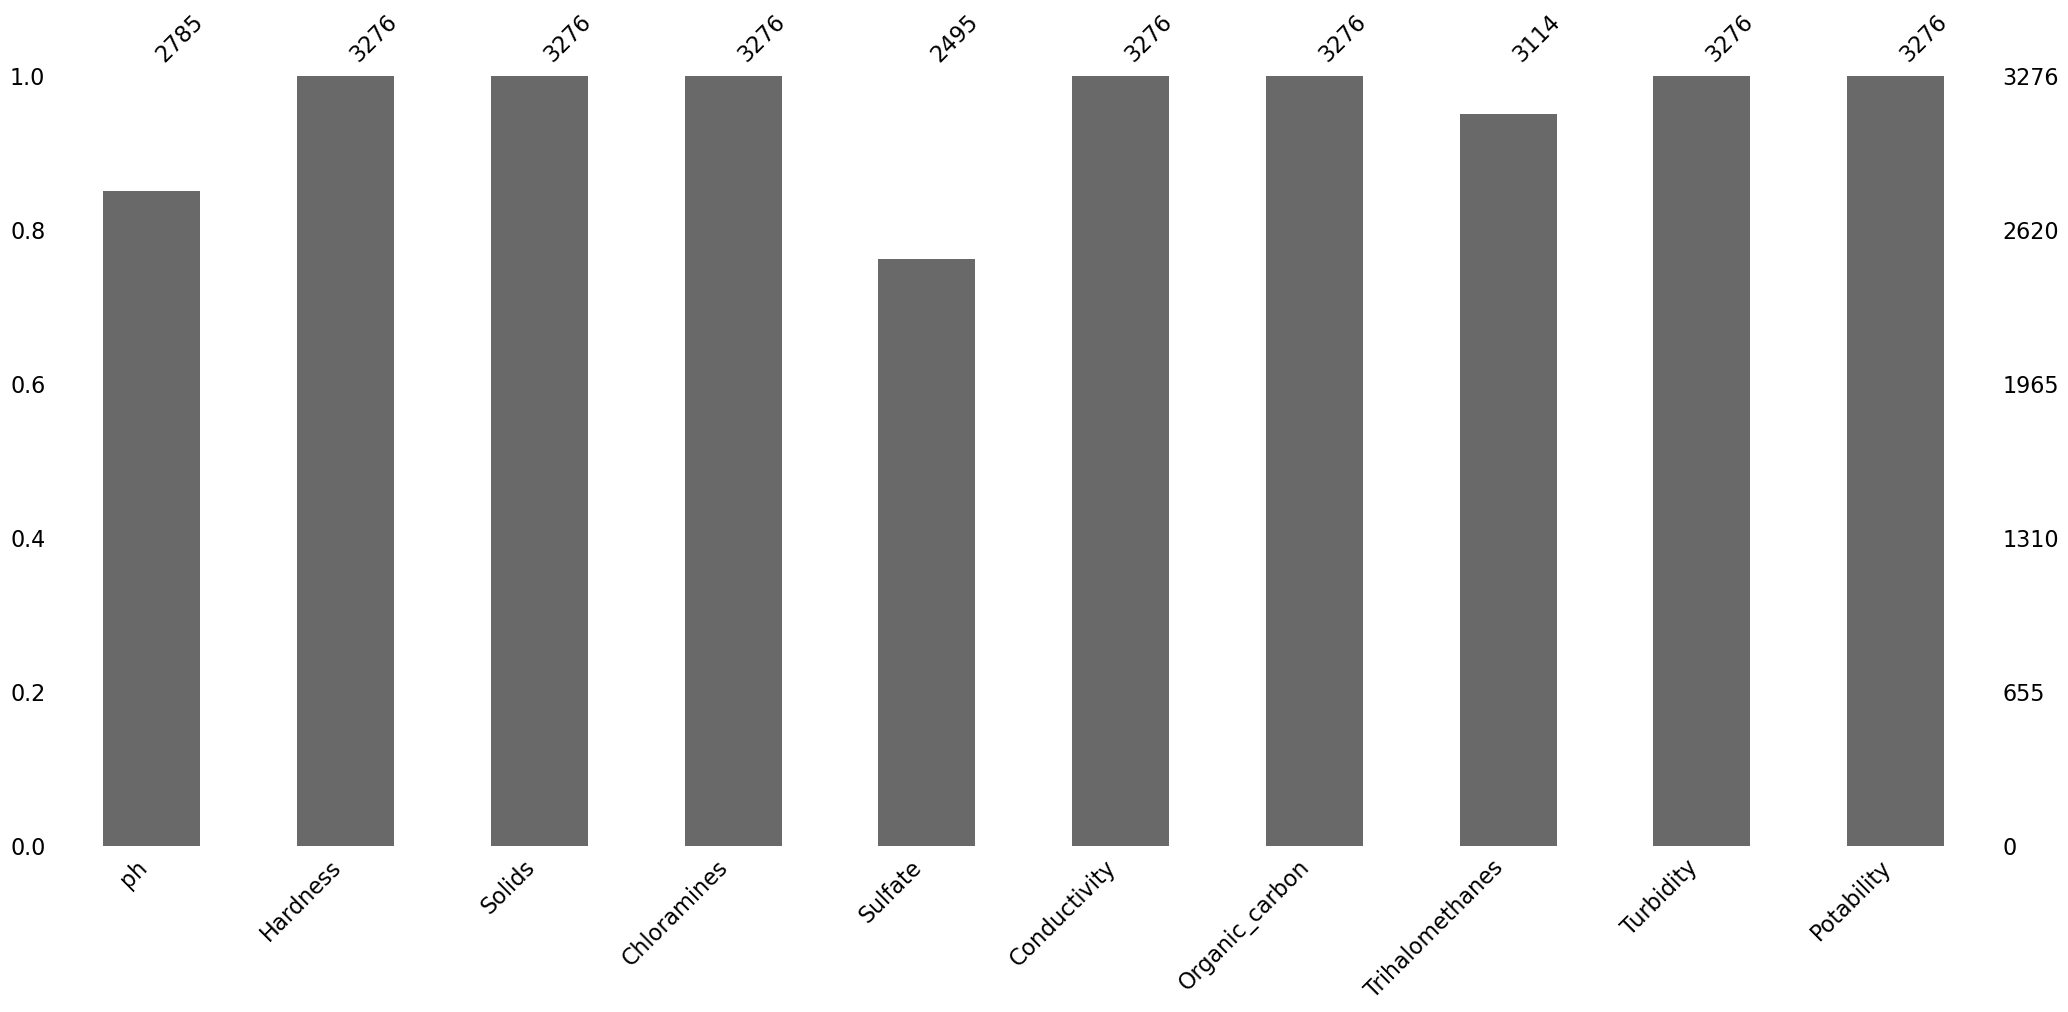

In [104]:
print('DETECTION DES VALEURS MANQUANTES VIA UN HISTOGRAMME')
print("Nombre d'observations :", water_potability.shape[0])
import missingno as msno
msno.bar(water_potability)

In [105]:
wp = water_potability

stats = ['mean', 'sum', 'count', 'std', 'var', 'min', 'max', 'median', 'mode', 'skew', 'kurt']

# Pour chaque colonne chaque statistique
for col in wp.columns:
    print(f"\nStatistiques pour la colonne {col} :")
    for stat in stats:
        print(f"{stat.capitalize()} : {getattr(wp[col], stat)()}")


Statistiques pour la colonne ph :
Mean : 7.080794504276835
Sum : 19720.012694410987
Count : 2785
Std : 1.5943195187088117
Var : 2.5418547277358967
Min : 0.0
Max : 13.999999999999998
Median : 7.036752103833548
Mode : 0        0.000000
1        0.227499
2        0.975578
3        0.989912
4        1.431782
          ...    
2780    12.246928
2781    13.175402
2782    13.349889
2783    13.541240
2784    14.000000
Name: ph, Length: 2785, dtype: float64
Skew : 0.025630447632210205
Kurt : 0.7203155798283807

Statistiques pour la colonne Hardness :
Mean : 196.36949601730151
Sum : 643306.4689526798
Count : 3276
Std : 32.879761476294185
Var : 1081.078714737999
Min : 47.432
Max : 323.124
Median : 196.96762686363076
Mode : 0        47.432000
1        73.492234
2        77.459586
3        81.710895
4        94.091307
           ...    
3271    307.706024
3272    308.253833
3273    311.383956
3274    317.338124
3275    323.124000
Name: Hardness, Length: 3276, dtype: float64
Skew : -0.0393417047767

In [106]:
print("Statistiques pour chaque colonne avec  le skewness (asymétrie) ")
print(" et le kurtosis (aplatissement):")
df = water_potability
stats_df = pd.DataFrame()

for col in df.columns:
    stats_df[col] = pd.Series({
        'Moyenne': df[col].mean(),
        'Somme': df[col].sum(),
        'Non-nulles': df[col].count(),
        'Écart type': df[col].std(),
        'Variance': df[col].var(),
        'Minimum': df[col].min(),
        'Maximum': df[col].max(),
        'Médiane': df[col].median(),
        'Mode': df[col].mode()[0],
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt()
    })

print(stats_df)

Statistiques pour chaque colonne avec  le skewness (asymétrie) 
 et le kurtosis (aplatissement):
                      ph       Hardness        Solids   Chloramines  \
Moyenne         7.080795     196.369496  2.201409e+04      7.122277   
Somme       19720.012694  643306.468953  7.211817e+07  23332.578775   
Non-nulles   2785.000000    3276.000000  3.276000e+03   3276.000000   
Écart type      1.594320      32.879761  8.768571e+03      1.583085   
Variance        2.541855    1081.078715  7.688783e+07      2.506158   
Minimum         0.000000      47.432000  3.209426e+02      0.352000   
Maximum        14.000000     323.124000  6.122720e+04     13.127000   
Médiane         7.036752     196.967627  2.092783e+04      7.130299   
Mode            0.000000      47.432000  3.209426e+02      0.352000   
Skewness        0.025630      -0.039342  6.216345e-01     -0.012098   
Kurtosis        0.720316       0.615772  4.428261e-01      0.589901   

                  Sulfate  Conductivity  Organic_c

## **Voici une synthèse de la potabilité de l'eau : résultats des statistiques de colonnes.**



### 1. pH
Le pH moyen de l'eau testée est de **7.08**, ce qui est proche de la neutralité. Cela suggère que l'eau n'est ni trop acide ni trop basique, ce qui est généralement favorable à la potabilité. La distribution est légèrement asymétrique à droite avec une variabilité modérée. Cependant, certaines valeurs extrêmes (0 et 14) suggèrent des erreurs de mesure.

### 2. Dureté
La dureté moyenne de l'eau est de **196.37**, indiquant une dureté modérée. Cela n'affecte pas directement la potabilité, mais peut avoir un impact sur le goût et l'usage domestique. La distribution est légèrement asymétrique à gauche avec une variabilité modérée.

### 3. Solides
La concentration moyenne de solides dans l'eau est relativement élevée à **22014.09**. Une concentration élevée de solides peut affecter la clarté et la potabilité de l'eau. La distribution est asymétrique à droite, ce qui suggère quelques valeurs très élevées.

### 4. Chloramines
La concentration moyenne de chloramines est de **7.12**, indiquant une concentration modérée. Une concentration modérée de chloramines est courante dans l'eau traitée, car elles sont souvent utilisées pour la désinfection. La distribution est presque symétrique avec une variabilité modérée.

### 5. Sulfate
La concentration moyenne de sulfate dans l'eau est de **333.78**, indiquant une concentration modérée. Une concentration modérée de sulfate est acceptable pour la potabilité, bien qu'elle puisse affecter le goût à des concentrations plus élevées. La distribution est légèrement asymétrique à gauche avec une variabilité modérée.

### 6. Conductivité
La conductivité moyenne de l'eau est de **426.21**, indiquant une conductivité modérée. La conductivité modérée de l'eau est généralement acceptable pour la potabilité. La distribution est légèrement asymétrique à droite avec une variabilité modérée.

### 7. Carbone Organique
La concentration moyenne de carbone organique est de **14.28**, indiquant une concentration modérée. Une concentration modérée de carbone organique n'affecte pas directement la potabilité, mais peut indiquer la présence de matière organique dans l'eau. La distribution est presque symétrique avec une variabilité modérée.

### 8. Trihalométhanes
La concentration moyenne de trihalométhanes est de **66.40**, indiquant une concentration modérée. Une concentration modérée de trihalométhanes est courante dans l'eau traitée, mais à des concentrations plus élevées, elle peut poser des risques pour la santé. La distribution est légèrement asymétrique à gauche avec une variabilité modérée.

### 9. Turbidité
La turbidité moyenne de l'eau est de **3.97**, indiquant une turbidité modérée. Une turbidité modérée peut affecter la clarté de l'eau, mais n'affecte pas directement la potabilité. La distribution est presque symétrique avec une variabilité faible à modérée.

### 10. Potabilité
La potabilité moyenne est de **0.39**, ce qui indique que **39%** des échantillons sont potentiellement potables. Cependant, la distribution est asymétrique à droite avec une variabilité élevée, ce qui signifie que la majorité des échantillons ne sont pas potables. En effet, la médiane et le mode sont tous deux à **0**, confirmant que plus de la moitié des échantillons ne sont pas potables. La distribution est très aplatie, ce qui indique peu de valeurs extrêmes en termes de potabilité. Seulement **39%** des échantillons sont potentiellement potables, ce qui suggère que la majorité de l'eau testée n'est pas potable.

### **Synthèse détaillée en stats par colonnes :**

### Analysons les différentes colonnes du tableau :


vue d'ensemble des différentes caractéristiques de l'eau testée, en soulignant les variations et la distribution des différents paramètres mesurés.

### 1. pH
- **Moyenne** : 7.08, ce qui est proche de la neutralité (7), indiquant que l’eau est globalement ni acide ni basique.
- **Somme** : 19720.01, la somme totale des valeurs de pH mesurées.
- **Non-nulles** : 2785, ce qui représente le nombre d'échantillons d'eau testés pour le pH.
- **Écart type** : 1.59, indiquant une variabilité modérée des valeurs de pH.
- **Variance** : 2.54, mesurant la dispersion des valeurs de pH autour de la moyenne.
- **Minimum** : 0, ce qui est très acide et peut être une valeur aberrante ou une erreur de mesure.
- **Maximum** : 14, ce qui est très basique et également une valeur extrême.
- **Médiane** : 7.04, proche de la moyenne, confirmant une répartition équilibrée autour de la neutralité.
- **Mode** : 0, ce qui est surprenant et suggère peut-être des erreurs de mesure.
- **Skewness (Asymétrie)** : 0.03, indiquant une distribution légèrement asymétrique à droite.
- **Kurtosis (Aplatissement)** : 0.72, indiquant une distribution légèrement plus aplatie que la normale.

### 2. Hardness (Dureté)
- **Moyenne** : 196.37, ce qui correspond à une dureté modérée de l'eau.
- **Somme** : 643306.47, la somme totale des valeurs de dureté mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour la dureté.
- **Écart type** : 32.88, indiquant une variabilité modérée dans la dureté de l'eau.
- **Variance** : 1081.08, mesurant la dispersion des valeurs de dureté.
- **Minimum** : 47.43, indiquant une eau douce.
- **Maximum** : 323.12, indiquant une eau très dure.
- **Médiane** : 196.97, proche de la moyenne, confirmant une distribution équilibrée.
- **Mode** : 47.43, suggérant qu'un nombre significatif d'échantillons ont une dureté faible.
- **Skewness** : -0.04, indiquant une distribution légèrement asymétrique à gauche.
- **Kurtosis** : 0.62, indiquant une distribution légèrement plus aplatie que la normale.

### 3. Solids (Solides)
- **Moyenne** : 22014.09, ce qui est relativement élevé et peut indiquer une présence significative de solides dissous dans l'eau.
- **Somme** : 72118170, la somme totale des valeurs de solides mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour les solides.
- **Écart type** : 8768.57, indiquant une variabilité élevée des solides dissous.
- **Variance** : 76887830, mesurant la dispersion des valeurs de solides.
- **Minimum** : 320.94, indiquant une eau relativement propre.
- **Maximum** : 61227.20, indiquant une eau très chargée en solides dissous.
- **Médiane** : 20927.83, légèrement en dessous de la moyenne, suggérant quelques valeurs très élevées.
- **Mode** : 320.94, suggérant une présence significative d'échantillons avec peu de solides.
- **Skewness** : 0.62, indiquant une distribution asymétrique à droite avec des valeurs extrêmes élevées.
- **Kurtosis** : 0.44, indiquant une distribution plus aplatie que la normale.

### 4. Chloramines
- **Moyenne** : 7.12, indiquant une concentration modérée de chloramines.
- **Somme** : 23332.58, la somme totale des valeurs de chloramines mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour les chloramines.
- **Écart type** : 1.58, indiquant une variabilité modérée des chloramines.
- **Variance** : 2.51, mesurant la dispersion des valeurs de chloramines.
- **Minimum** : 0.35, indiquant une faible concentration de chloramines.
- **Maximum** : 13.13, indiquant une concentration élevée de chloramines.
- **Médiane** : 7.13, très proche de la moyenne, confirmant une répartition équilibrée.
- **Mode** : 0.35, suggérant quelques échantillons avec très peu de chloramines.
- **Skewness** : -0.01, indiquant une distribution presque symétrique.
- **Kurtosis** : 0.59, indiquant une distribution légèrement plus aplatie que la normale.

### 5. Sulfate
- **Moyenne** : 333.78, indiquant une concentration modérée de sulfate dans l'eau.
- **Somme** : 832770.56, la somme totale des valeurs de sulfate mesurées.
- **Non-nulles** : 2495, nombre d'échantillons d'eau testés pour les sulfates.
- **Écart type** : 41.42, indiquant une variabilité modérée des sulfates.
- **Variance** : 1715.35, mesurant la dispersion des valeurs de sulfate.
- **Minimum** : 129.00, indiquant une faible concentration de sulfate.
- **Maximum** : 481.03, indiquant une concentration élevée de sulfate.
- **Médiane** : 333.07, très proche de la moyenne, confirmant une répartition équilibrée.
- **Mode** : 129.00, suggérant quelques échantillons avec très peu de sulfate.
- **Skewness** : -0.04, indiquant une distribution légèrement asymétrique à gauche.
- **Kurtosis** : 0.65, indiquant une distribution légèrement plus aplatie que la normale.

### 6. Conductivity (Conductivité)
- **Moyenne** : 426.21, indiquant une conductivité modérée de l'eau.
- **Somme** : 1396248.00, la somme totale des valeurs de conductivité mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour la conductivité.
- **Écart type** : 80.82, indiquant une variabilité modérée de la conductivité.
- **Variance** : 6532.53, mesurant la dispersion des valeurs de conductivité.
- **Minimum** : 181.48, indiquant une faible conductivité.
- **Maximum** : 753.34, indiquant une conductivité élevée.
- **Médiane** : 421.89, très proche de la moyenne, confirmant une répartition équilibrée.
- **Mode** : 181.48, suggérant quelques échantillons avec une faible conductivité.
- **Skewness** : 0.26, indiquant une distribution légèrement asymétrique à droite.
- **Kurtosis** : -0.28, indiquant une distribution légèrement plus aplatie que la normale.

### 7. Organic Carbon (Carbone Organique)
- **Moyenne** : 14.28, indiquant une concentration modérée de carbone organique.
- **Somme** : 46797.56, la somme totale des valeurs de carbone organique mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour le carbone organique.
- **Écart type** : 3.31, indiquant une variabilité modérée du carbone organique.
- **Variance** : 10.94, mesurant la dispersion des valeurs de carbone organique.
- **Minimum** : 2.20, indiquant une faible concentration de carbone organique.
- **Maximum** : 28.30, indiquant une concentration élevée de carbone organique.
- **Médiane** : 14.22, très proche de la moyenne, confirmant une répartition équilibrée.
- **Mode** : 2.20, suggérant quelques échantillons avec très peu de carbone organique.
- **Skewness** : 0.03, indiquant une distribution presque symétrique.
- **Kurtosis** : 0.04, indiquant une distribution normale.

### 8. Trihalomethanes
- **Moyenne** : 66.40, indiquant une concentration modérée de trihalométhanes.
- **Somme** : 206758.06, la somme totale des valeurs de trihalométhanes mesurées.
- **Non-nulles** : 3114, nombre d'échantillons d'eau testés pour les trihalométhanes.
- **Écart type** : 16.18, indiquant une variabilité modérée des trihalométhanes.
- **Variance** : 261.63, mesurant la dispersion des valeurs de trihalométhanes.
- **Minimum** : 0.74, indiquant une très faible concentration de trihalométhanes.
- **Maximum** : 124.00, indiquant une concentration élevée de trihalométhanes.
- **Médiane** : 66.62, très proche de la moyenne, confirmant une répartition équilibrée.
- **Mode** : 0.74, suggérant quelques échantillons avec une concentration très faible de trihalométhanes.
- **Skewness** : -0.08, indiquant une distribution légèrement asymétrique à gauche.
- **Kurtosis** : 0.24, indiquant une distribution légèrement plus aplatie que la normale.

### 9. Turbidity (Turbidité)
- **Moyenne** : 3.97, indiquant une turbidité modérée de l'eau.
- **Somme** : 12995.19, la somme totale des valeurs de turbidité mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour la turbidité.
- **Écart type** : 0.78, indiquant une variabilité faible à modérée de la turbidité.
- **Variance** : 0.61, mesurant la dispersion des valeurs de turbidité.
- **Minimum** : 1.45, indiquant une très faible turbidité.
- **Maximum** : 6.74, indiquant une turbidité relativement élevée.
- **Médiane** : 3.96, très proche de la moyenne, confirmant une répartition équilibrée.
- **Mode** : 1.45, suggérant quelques échantillons avec une très faible turbidité.
- **Skewness** : -0.01, indiquant une distribution presque symétrique.
- **Kurtosis** : -0.06, indiquant une distribution légèrement plus aplatie que la normale.

### 10. Potability (Potabilité)
- **Moyenne** : 0.39, indiquant que 39% des échantillons sont potentiellement potables.
- **Somme** : 1278, la somme totale des valeurs de potabilité mesurées.
- **Non-nulles** : 3276, nombre d'échantillons d'eau testés pour la potabilité.
- **Écart type** : 0.49, indiquant une variabilité élevée de la potabilité.
- **Variance** : 0.24, mesurant la dispersion des valeurs de potabilité.
- **Minimum** : 0, indiquant que certains échantillons ne sont pas potables.
- **Maximum** : 1, indiquant que certains échantillons sont potables.
- **Médiane** : 0, indiquant que plus de la moitié des échantillons ne sont pas potables.
- **Mode** : 0, suggérant que la majorité des échantillons ne sont pas potables.
- **Skewness** : 0.45, indiquant une distribution asymétrique à droite, avec une majorité d'échantillons non potables.
- **Kurtosis** : -1.80, indiquant une distribution très aplatie avec peu de valeurs extrêmes.


In [107]:
Potability_count = water_potability['Potability'].value_counts()
print(Potability_count)

Potability
0    1998
1    1278
Name: count, dtype: int64


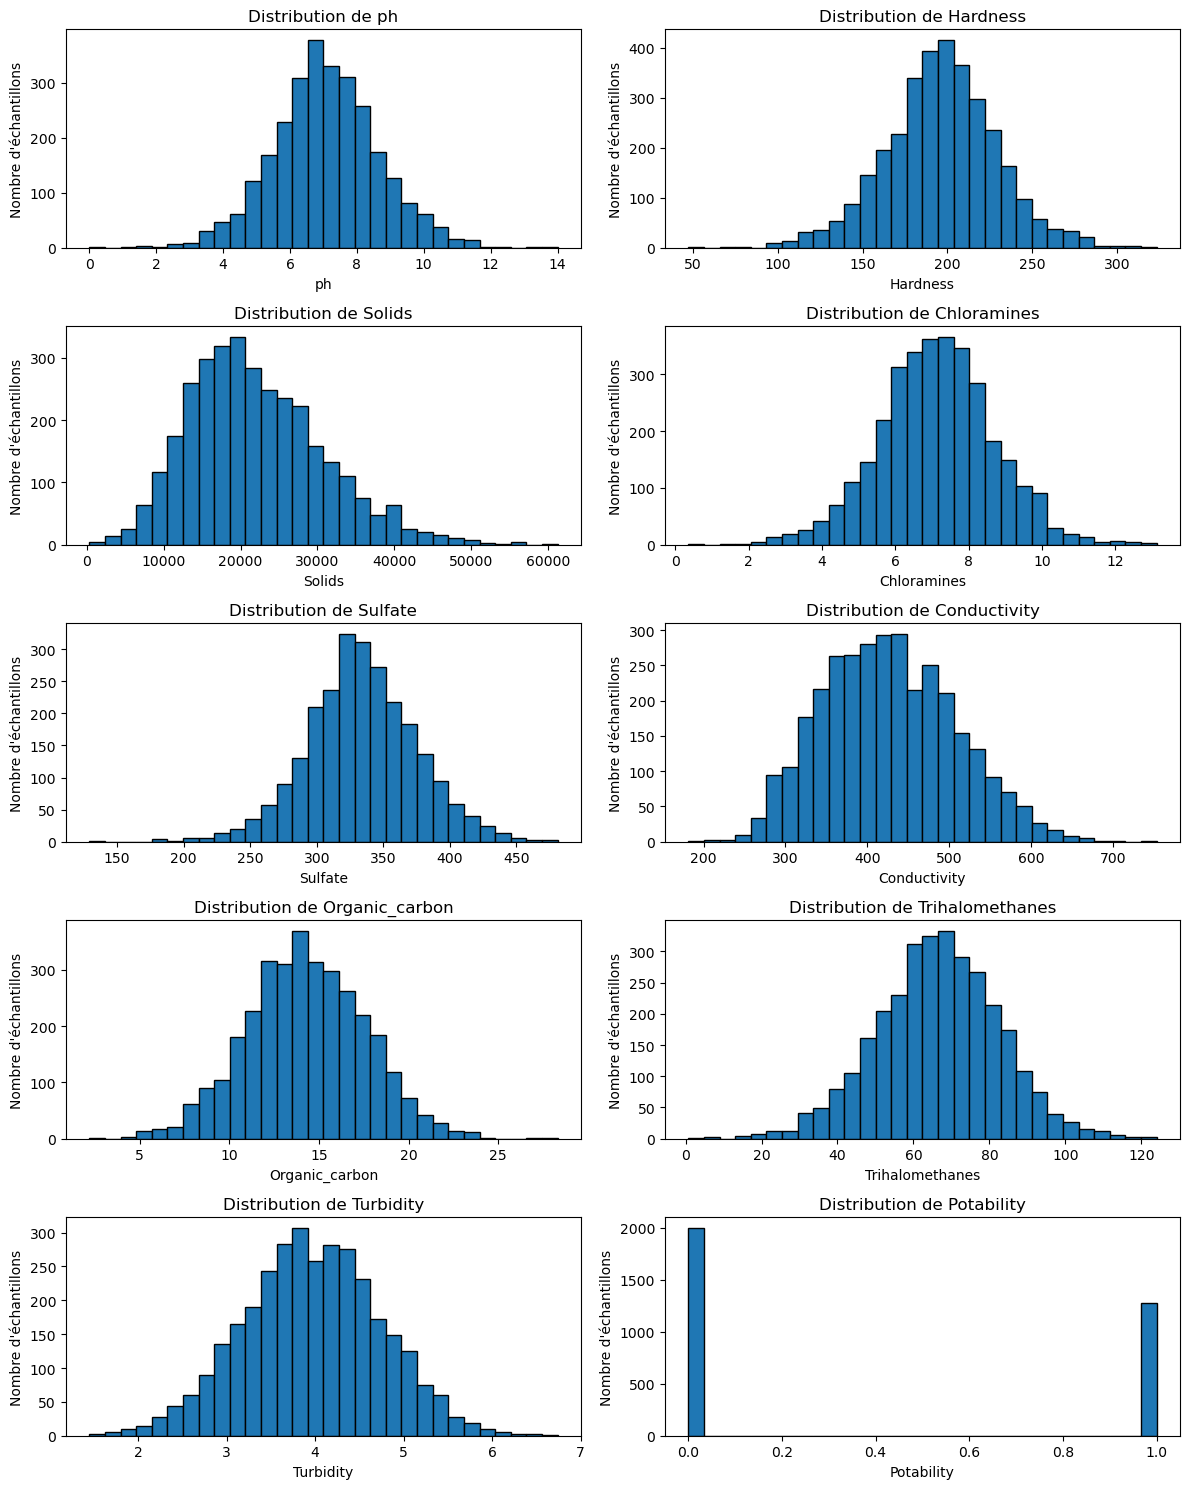

In [108]:
import math
import matplotlib.pyplot as plt

fig, axs = plt.subplots(math.ceil(len(water_potability.columns) / 2), 2, figsize=(12, 3 * math.ceil(len(water_potability.columns) / 2)))

for i, column in enumerate(water_potability.columns):
    ax = axs[i // 2, i % 2]
    ax.hist(water_potability[column], bins=30, edgecolor='black')
    ax.set_title(f'Distribution de {column}')
    ax.set_xlabel(column)  # Ajout de la description en abscisse
    ax.set_ylabel('Nombre d\'échantillons')  # Ajout de la description en ordonnée

# Supprimer les axes vides
if len(water_potability.columns) % 2:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()


# 1. Machine à vecteurs de support (SVM):

Support Vector Machine (SVM) : algorithme d'apprentissage supervisé pour la classification et la régression. Il fonctionne en trouvant l'hyperplan optimal qui sépare les différentes classes dans un espace de caractéristiques. Cet hyperplan est choisi de manière à maximiser la marge entre les points de données de chaque classe.

Prédire la potabilité de l'eau (variable cible `Potability`), ainsi qu'une explication étape par étape de chaque composant :

1. **Chargement des données et séparation des caractéristiques et de la variable cible.**
2. **Division des données en ensembles d'entraînement et de test.**
3. **Normalisation des caractéristiques.**
4. **Création, entraînement et évaluation du modèle SVM.**

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

data = water_potability

# Séparer (X) de la variable cible (y)
X = data.drop(columns=["Potability"])
y = data["Potability"]

# Gérer valeurs manquantes remplacement par la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Diviser en ensembles d'entraînement et de test 20/80
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Normaliser 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle SVM
svm_model = SVC(kernel="linear", C=1.0)

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision du modèle : {accuracy:.2f}")
print("Rapport de classification :\n", report)

Précision du modèle : 0.63
Rapport de classification :
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion SVM :

### Mon modèle SVM a une précision globale de 0.63, performant bien pour la classe 'potable' mais échouant pour la classe 'non potable'. Les résultats suggèrent un déséquilibre des classes. Pour améliorer les performances, je peux rééchantillonner les données, ajuster les poids des classes, ou utiliser un modèle différent.

Pour interpréter les résultats de mon modèle SVM, il est important de comprendre plusieurs métriques clés fournies par le rapport de classification : la précision, le rappel, le score F1, et le support pour chaque classe. Voici une explication détaillée de ces métriques et de ce que mes résultats indiquent :

### Interprétation des métriques

1. **Précision (Precision)** :
   - La précision est le ratio des prédictions correctes de la classe positive sur toutes les prédictions positives faites par le modèle.
   - \(\text{Précision} = \frac{\text{Vrai Positifs}}{\text{Vrai Positifs} + \text{Faux Positifs}}\)

2. **Rappel (Recall)** :
   - Le rappel est le ratio des prédictions correctes de la classe positive sur tous les échantillons réels de la classe positive.
   - \(\text{Rappel} = \frac{\text{Vrai Positifs}}{\text{Vrai Positifs} + \text{Faux Négatifs}}\)

3. **Score F1 (F1-score)** :
   - Le score F1 est la moyenne harmonique de la précision et du rappel, offrant une mesure équilibrée entre les deux.
   - \(\text{F1-score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}\)

4. **Support** :
   - Le support est le nombre d'occurrences de chaque classe dans les données de test.

### Résultats du modèle

- **Classe 0** (Potable) :
  - Précision : 0.63
  - Rappel : 1.00
  - Score F1 : 0.77
  - Support : 412

- **Classe 1** (Non potable) :
  - Précision : 0.00
  - Rappel : 0.00
  - Score F1 : 0.00
  - Support : 244

- **Précision globale (Accuracy)** : 0.63
- **Macro avg** : Moyenne des métriques pour chaque classe.
- **Weighted avg** : Moyenne pondérée des métriques pour chaque classe, en fonction du support.

### Analyse des résultats

1. **Précision globale** :
   - La précision globale de 0.63 signifie que le modèle a correctement prédit 63% des échantillons. Bien que ce soit mieux que le hasard (qui serait 50% pour une distribution équilibrée), ce n'est pas particulièrement élevé.

2. **Classe 0 (Potable)** :
   - La précision de 0.63 signifie que lorsque le modèle prédit que l'eau est potable, il a raison 63% du temps.
   - Le rappel de 1.00 signifie que le modèle a correctement identifié tous les échantillons d'eau potable (aucun faux négatif).
   - Le score F1 de 0.77 est une bonne mesure de performance pour cette classe, montrant un équilibre raisonnable entre précision et rappel.

3. **Classe 1 (Non potable)** :
   - La précision, le rappel et le score F1 sont tous à 0.00, ce qui indique que le modèle n'a pas réussi à identifier correctement les échantillons d'eau non potable.
   - Le support de 244 indique qu'il y avait 244 échantillons d'eau non potable dans les données de test, mais le modèle n'a pas réussi à en prédire correctement un seul.

### Conclusions et recommandations

- **Déséquilibre des classes** : Les résultats suggèrent un déséquilibre entre les classes, où la classe `0` (potable) est bien représentée, mais la classe `1` (non potable) ne l'est pas. Le modèle a tendance à prédire majoritairement la classe `0`.
- **Modèle amélioré** : Pour améliorer les performances, je peux :
  - **Rééchantillonner les données** : Utiliser des techniques de rééchantillonnage comme l'oversampling de la classe minoritaire (SMOTE) ou l'undersampling de la classe majoritaire.
  - **Ajuster les poids des classes** : Utiliser des poids de classe pour donner plus d'importance à la classe minoritaire dans l'algorithme SVM.
  - **Utiliser un modèle différent** : Explorer d'autres algorithmes de classification qui peuvent gérer les déséquilibres de classe plus efficacement.



### Ré-échantillonnage avec SMOTE & SVM
 
Voici un exemple de code que j'utilise avec SMOTE pour rééchantillonner les données avant d'entraîner le modèle SVM

In [110]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Remplacer valeurs manquantes avec la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Ré-échantillonnage des données avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Diviser les données rééchantillonnées en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle SVM
svm_model = SVC(kernel="linear", C=1.0)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision du modèle : {accuracy:.2f}")
print("Rapport de classification :\n", report)

Précision du modèle : 0.51
Rapport de classification :
               precision    recall  f1-score   support

           0       0.50      0.56      0.53       394
           1       0.52      0.45      0.48       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.50       800



D'après les résultats de votre modèle sur le jeu de données sur l'eau, voici un débriefing :

La **précision globale** du modèle est de **0.51**. Cela signifie que le modèle a correctement prédit 51% des instances.

En ce qui concerne le **rapport de classification**, voici une explication détaillée :

- Pour la classe 0 :
    - La **précision** est de **0.50**, ce qui signifie que 50% des instances prédites comme 0 étaient effectivement 0.
    - Le **rappel** est de **0.56**, ce qui signifie que le modèle a correctement identifié 56% des instances réelles de la classe 0.
    - Le **score F1** est de **0.53**, qui est une moyenne harmonique de la précision et du rappel.

- Pour la classe 1 :
    - La **précision** est de **0.52**, ce qui signifie que 52% des instances prédites comme 1 étaient effectivement 1.
    - Le **rappel** est de **0.45**, ce qui signifie que le modèle a correctement identifié 45% des instances réelles de la classe 1.
    - Le **score F1** est de **0.48**, qui est une moyenne harmonique de la précision et du rappel.

Ces résultats indiquent que le modèle a une performance similaire pour les deux classes, **mais il y a encore de la place pour l'amélioration.** .

### Importance des Caractéristiques : l'importance des caractéristiques, modèle de forêt aléatoire pour sélectionner les caractéristiques les plus importantes.

Rappel : x_imputed est waterflow data sans les valeurs manquantes mais remplacé par la moyenne.

1. feature ph (0.12917626565862006)
2. feature Sulfate (0.12803006688618712)
3. feature Hardness (0.12209277593132067)
4. feature Solids (0.1157618299754018)
5. feature Chloramines (0.1155762163094049)
6. feature Organic_carbon (0.09943837772650888)
7. feature Conductivity (0.09867023275905103)
8. feature Trihalomethanes (0.09717255392069322)
9. feature Turbidity (0.09408168083281229)


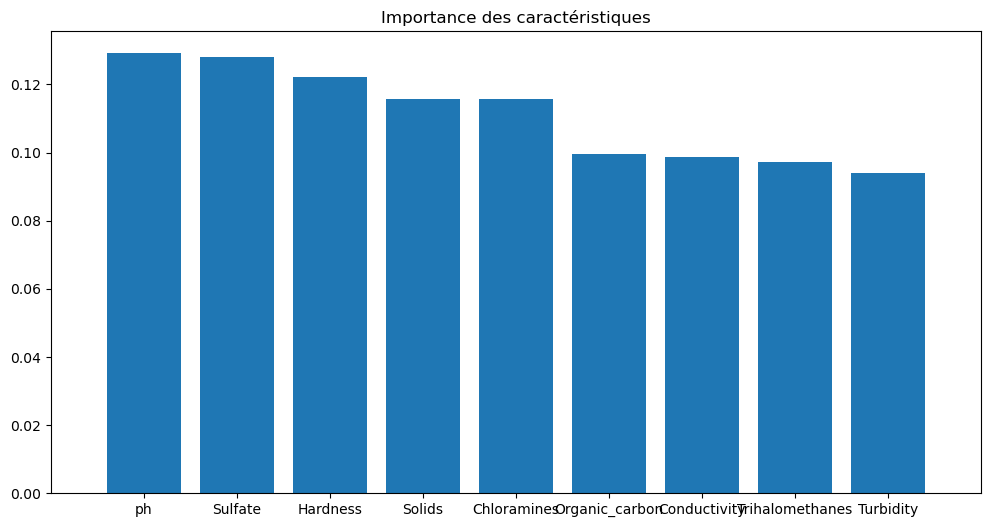

In [111]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

rf = RandomForestClassifier(random_state=42)
rf.fit(X_imputed, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Afficher le nom de la caractéristique au lieu de l'indice
for f in range(X_imputed.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

plt.figure(figsize=(12, 6))
plt.title("Importance des caractéristiques")
plt.bar(range(X_imputed.shape[1]), importances[indices], align="center")
plt.xticks(range(X_imputed.shape[1]), [feature_names[i] for i in indices])
plt.xlim([-1, X_imputed.shape[1]])
plt.show()

# CONCLUSION :  **sur L'importance des Caractéristiques** : 


ph : Avec une importance de 0.129, c’est la caractéristique la plus importante selon le modèle. Cela signifie que les variations de cette caractéristique ont le plus grand impact sur la prédiction de la variable cible.


Sulfate : C’est la deuxième caractéristique la plus importante avec une importance de 0.128.


Hardness : C’est la troisième caractéristique la plus importante avec une importance de 0.122.


Solids, Chloramines, Organic_carbon, Conductivity, Trihalomethanes, et Turbidity : Ces caractéristiques ont également une importance significative, bien que moindre que les trois premières.

In [112]:
print('rappel des colonnes')
water_potability.columns

rappel des colonnes


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [113]:
#! pip install xgboost

## **Résultats xboost:**
**Pour le premier échantillon de données, le modèle prédit une probabilité de 68.3% pour la classe 0 (non potable) et de 31.7% pour la classe 1 (potable).**

In [114]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = data.drop('Potability', axis=1)
y = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir en DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 3,  # Profondeur max de chaque arbre
    'eta': 0.3,  # Taux d'apprentissage
    'objective': 'multi:softprob',  # Objectif d'apprentissage
    'num_class': 2}  

# Nombre de tours d'apprentissage
num_round = 20

# Entraîner
model = xgb.train(param, dtrain, num_round)

predictions = model.predict(dtest)
predictions

array([[0.6829625 , 0.31703755],
       [0.60608757, 0.3939125 ],
       [0.5805464 , 0.41945368],
       ...,
       [0.63197374, 0.36802632],
       [0.53558546, 0.46441454],
       [0.6978832 , 0.3021168 ]], dtype=float32)

# **MLFLOW :**


# **Préparation des données**

In [115]:
print("Prétraitement des données pour un problème de classification :\n")
print("Séparation des caractéristiques et des cibles : `X` pour les caractéristiques et `y` pour la cible.\n")
print("Division des données : Création des ensembles d'entraînement et de validation.\n")
print("Standardisation : Transformation des caractéristiques pour avoir une moyenne de 0 et un écart-type de 1.")

Prétraitement des données pour un problème de classification :

Séparation des caractéristiques et des cibles : `X` pour les caractéristiques et `y` pour la cible.

Division des données : Création des ensembles d'entraînement et de validation.

Standardisation : Transformation des caractéristiques pour avoir une moyenne de 0 et un écart-type de 1.


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [117]:
from sklearn.impute import SimpleImputer

data = water_potability

X = data.drop('Potability', axis=1)
y = data['Potability']

# Gérer les valeurs manquantes en remplaçant par la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## **Création du modèle :**
## **Perceptron Multicouches**


Le modèle a une couche d'entrée avec 8 neurones : 
- une couche cachée avec 12 neurones 
- une autre couche cachée avec 8 neurones
- une couche de sortie avec 1 neurone. 


L'activation relu est utilisée pour les couches cachées et sigmoid pour la couche de sortie.

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = water_potability

X = data.drop('Potability', axis=1)
y = data['Potability']

# Gérer les valeurs manquantes en remplaçant par la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [119]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))  # Changé input_dim à 9
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\change\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Entraînement du modèle :**
Nombre de neurones dans les couches d'entrée et de sortie, le nombre d'époques, la taille du lot etc...

Binary_crossentropy pour classification binaire 


Entrainé 150 époques avec une taille de lot de 10.

In [120]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=150, batch_size=10)

Epoch 1/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4725 - loss: 0.7699
Epoch 2/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5949 - loss: 0.6741
Epoch 3/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6125 - loss: 0.6605
Epoch 4/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6122 - loss: 0.6572
Epoch 5/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6359 - loss: 0.6471
Epoch 6/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6633 - loss: 0.6284
Epoch 7/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6348 - loss: 0.6355
Epoch 8/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6530 - loss: 0.6257
Epoch 9/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - loss: 0.6110
Epoch 10/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6687 - loss: 0.6106
Epoch 11/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6776 - loss: 0.6046
Epoch 12/150
262/262 ━━━━━━━━━━━━━━━━━━━━

## **Évaluation du modèle :**

In [121]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4806 - loss: 2264.9724  
Accuracy: 49.54


# **Les étapes et l'interprétation de l'accuracy à la fin :**

1. **Importation des bibliothèques** :

2. **Chargement des données** :

3. **Séparation des features et de la target** :
4. **Imputation des valeurs manquantes (SimpleImputer)** :
5. **Séparation des données en ensembles d'entraînement et de validation (train_test_split)** :
6. **Standardisation des données (StandardScaler)** :
7. **Construction du modèle de réseau de neurones (Keras Sequential Model)** :
8. **Compilation du modèle (Keras compile)** :
9. **Entraînement du modèle (Keras fit)** :
10. **Évaluation du modèle** :


### Interprétation de l'Accuracy :

Après l'entraînement du modèle pendant 150 epochs, l'accuracy finale est de 49.54%. 


Cette valeur est relativement faible, ce qui suggère que le modèle a des performances médiocres et qu'il pourrait nécessiter des ajustements supplémentaires, comme le réglage des hyperparamètres, l'ajout de couches supplémentaires, ou même la révision de la prétraitement des données.

### Note :
L'output affiche également un "loss" très élevé (2264.9724), ce qui indique qu'il pourrait y avoir un problème avec les données ou la façon dont le modèle a été configuré.

Entraîner les modèles
Modèle Random Forest
Enregistrement avec MLflow :

# **FLASK**

In [ ]:
from flask import Flask, request, jsonify, render_template
import mlflow
import mlflow.keras
import pandas as pd
import numpy as np
import joblib

app = Flask(__name__)

# Set the MLflow tracking URI
mlflow.set_tracking_uri("http://localhost:5000")

# Load model from the MLflow Model Registry
model_name = "WaterQualityMLP"
model_version = 2  
model = mlflow.keras.load_model(f"models:/{model_name}/{model_version}")

# Load scaler used during training
scaler = joblib.load("artifacts/scaler.pkl")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get form data
    data = request.form.to_dict()
    
    # Convert form data to DataFrame
    input_df = pd.DataFrame([data])
    
    # Ensure the input data contains all necessary features
    required_features = [
        "ph", "Hardness", "Solids", "Chloramines", "Sulfate",
        "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"
    ]
    
    # Convert all feature values to numeric
    for feature in required_features:
        input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    
    # Preprocess input data using the same scaler
    X = scaler.transform(input_df)

    # Predict using the loaded model
    predictions_proba = model.predict(X)
    predictions = (predictions_proba > 0.5).astype(int).flatten()
    
    # Return predictions as JSON
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

### Réduction de la Dimensionnalité
### PCA (Principal Component Analysis) : PCA pour réduire la dimensionnalité des données et voir si cela améliore les performances.

## Je n'ai pas pu augmenter la taille du jeu de data !!! Kernel Et Python KO

In [ ]:
from sklearn.decomposition import PCA

# Appliquer PCA
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entraîner le modèle SVM sur les données réduites
svm_model_pca = SVC(kernel="linear", C=1.0)
svm_model_pca.fit(X_train_pca, y_train)

# Prédire et évaluer
y_pred_pca = svm_model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)

print(f"Précision du modèle SVM avec PCA : {accuracy_pca:.2f}")
print("Rapport de classification du modèle SVM avec PCA :\n", report_pca)